# Workbook 6
We will contiune our discussion on panel analysis. Begin discussion on spatial analysis.

## Random effects model practice
* Q1: Load the eviction_classdata.dta" from Catcourses. This is data 2012-2018 of eviction and demographic data at the county level.

* fips - fips code is a five-digit code where state is the first two digits and the last three digits are county code
* county - county name
* state - state name
* year - year 2012-2018
* type - eviction data was either observed or modeled
* filings - number of filings observed in proprietary data
* filing_rate - number of filings per 100 renting households
* threatened - number of households threatened with eviction observed in proprietary data
* threatened_rate - number of households threatened per 100 renting households
* judgements - number of judgements observed in proprietary data
* judgement_rate - number of judgements per 100 renting households
* medhhinc - median household income
* wht_per - % of white, not Latinx residents
* blk_per - % of Black, not Latinx residents
* lat_per - % of Latinx residents
* metro - metro (1-metro; 0-non-metro)

* Q2: Is this cross-sectional or panel data? Why? What is the unit of analysis?
* Q3: What are the possibilities for the time (t)? What is i represent?
* Q4: Let Stata know that this is a panel data clustered at i. Then, estimate the random effects model with Stata with filing_rate as the dependent variable and independent variables as" wht_per, medhhinc, metro, and year (with 2012 as the reference category). Write a few sentences about your findings. Be sure to specify the random effects part of the findings.

# random effect practice answers

In [1]:
use "C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week5\data\nhgis\eviction_classdata.dta", clear
xtset fips




Panel variable: fips (unbalanced)


In [2]:
xtsum filing_rate wht_per medhhinc


Variable         |      Mean   Std. dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
filing~e overall |  3.100356    5.27184        .01      122.2 |     N =    8377
         between |             5.845264        .02   115.3467 |     n =    1829
         within  |             .6506171  -4.991646   9.953688 | T-bar =  4.5801
                 |                                            |
wht_per  overall |  81.08263   17.82679   .7602209        100 |     N =    8377
         between |              19.0237   .8533897        100 |     n =    1829
         within  |             .7856144   74.43561   89.47023 | T-bar =  4.5801
                 |                                            |
medhhinc overall |  46932.44   11091.55      18972     125672 |     N =    8377
         between |              11949.1   19433.33     125672 |     n =    1829
         within  |             2327.665   34297.77   63448.77 | T-bar =

In [3]:
*mle stands for maximum likelihood estimation and vce is to use robust standard errors
xtreg filing_rate wht_per medhhinc i.metro i.year, mle vce(robust)


Fitting constant-only model:
Iteration 0:   log likelihood = -14371.557
Iteration 1:   log likelihood = -14342.759
Iteration 2:   log likelihood = -14341.361
Iteration 3:   log likelihood = -14341.355

Fitting full model:
Iteration 0:   log likelihood = -14714.068
Iteration 1:   log likelihood = -14687.459
Iteration 2:   log likelihood = -14194.008
Iteration 3:   log likelihood = -14133.539
Iteration 4:   log likelihood = -14131.553
Iteration 5:   log likelihood =  -14131.55
Iteration 6:   log likelihood =  -14131.55

Random-effects ML regression                         Number of obs    =  8,377
Group variable: fips                                 Number of groups =  1,829

Random effects u_i ~ Gaussian                        Obs per group:
                                                                  min =      1
                                                                  avg =    4.6
                                                                  max =      7

          

We estimated a random effects model that generalizes for the entire sample--between counties and within counties. The results report that counties with greater white residents have significantly lower filing eviction rate. Counties with significant greater median household income report lower filing eviction rate. There is a significant increase in eviction filing in 2014 as compared as 2012. Additionally, metro counties have significantly higher filing eviction rate.

### Between effects model
In Stata, you can use the xtreg command with "be" to estimate between effects model.

In [4]:
*loading data
use "https://www.stata-press.com/data/mlmus4/smoking.dta",clear
*use the i cluster
xtset momid

gen education=hsgrad*1+somecoll*2+collgrad*3
label define ed 0 "No HS Degree" 1 "HS Degree" 2 "Some Coll" 3 "College"
label values education ed

gen visit=1
replace visit=0 if novisit==1
replace visit=2 if pretri2==1
replace visit=3 if pretri3==1
label define visit 0 "No visit" 1 "1st trimester" 2 "2nd trimester" 3 "3rd trimester"
label values education visit




Panel variable: momid (unbalanced)





(78 real changes made)

(1,113 real changes made)

(194 real changes made)




In [5]:
*Running a between-effects model, notice how it differs from random effects model
xtreg birwt i.smoke male mage i.education married black ///
    kessner2 kessner3 novisit pretri2 pretri3, be


Between regression (regression on group means)  Number of obs     =      8,604
Group variable: momid                           Number of groups  =      3,978

R-squared:                                      Obs per group:
     Within  = 0.0299                                         min =          2
     Between = 0.1168                                         avg =        2.2
     Overall = 0.0949                                         max =          3

                                                F(13,3964)        =      40.31
sd(u_i + avg(e_i.)) = 424.7306                  Prob > F          =     0.0000

-------------------------------------------------------------------------------
        birwt | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
        smoke |
      Smoker  |  -286.1476   23.22554   -12.32   0.000    -331.6828   -240.6125
         male |   104.9432   19.49531     5.

Remember these results only report the population mean BETWEEN mothers only. When comparing between-mother effects, mothers who smoked during pregnancy have 286 grams significantly lower birthweight as compared to mother who did not smoke. Mothers with male new borns have 105 grams higher as compared to female new borns (a significant difference). Between mothers, we find that for every one year increase in mother's age there is a 4 grams significantly higher in birthweight of newborn. The table above reports that between mothers, as mothers educational attainment increases there is a corresponding significant increase in birthweight. The estimated coefficient between mothers for married mothers is 42 grams higher as compared for non-married mothers (p=.108). Between mothers, Black mothers have 218 grams significantly lower as compared to white mothers. As the kessner index increases for mothers, there is a corresponding significantly decrease in birthweight. Between mothers, mothers who did not have a prenatal visit have 51 grams lower in birthweight as compared to mothers who had their first prenatal visit in their first trimester.

Important notes, the sample of the between-effects model is 3,978.

## Between effects model Practice
* Q1: Re-load the eviction_classdata.dta" from Catcourses. This is data 2012-2018 of eviction and demographic data at the county level.

* fips - fips code is a five-digit code where state is the first two digits and the last three digits are county code
* county -county name
* state - state name
* year - year 2012-2018
* type - eviction data was either observed or modeled
* filings - number of filings observed in proprietary data
* filing_rate - number of filings per 100 renting households
* threatened - number of households threatened with eviction observed in proprietary data
* threatened_rate - number of households threatened per 100 renting households
* judgements - number of judgements observed in proprietary data
* judgement_rate - number of judgements per 100 renting households
* medhhinc - median household income
* wht_per - % of white, not Latinx residents
* blk_per - % of Black, not Latinx residents
* lat_per - % of Latinx residents
* metro - metro (1-metro; 0-non-metro)

* Q2: Let Stata know that this is a panel data clustered at i. Then, estimate the random effects model with Stata with filing_rate as the dependent variable and independent variables as" wht_per, medhhinc, and year (with 2012 as the reference category). Then, estimate the between effects model with Stata. Write a few sentences about your findings. Be sure to specify the between effects part of the findings.

## Between effects model practice

In [6]:
*load data
use "C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week5\data\nhgis\eviction_classdata.dta", clear
xtset fips




Panel variable: fips (unbalanced)


In [12]:
*"be" indicates a between-effects model
xtreg filing_rate wht_per medhhinc i.metro i.year, be


Between regression (regression on group means)  Number of obs     =      8,377
Group variable: fips                            Number of groups  =      1,829

R-squared:                                      Obs per group:
     Within  = 0.0002                                         min =          1
     Between = 0.2536                                         avg =        4.6
     Overall = 0.1566                                         max =          7

                                                F(9,1819)         =      68.69
sd(u_i + avg(e_i.)) = 5.062295                  Prob > F          =     0.0000

------------------------------------------------------------------------------
 filing_rate | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     wht_per |  -.0896735   .0064301   -13.95   0.000    -.1022846   -.0770624
    medhhinc |    .000017   .0000114     1.50   0.135    -5.29e-

In [7]:
*"be" indicates a between-effects model
xtreg filing_rate wht_per medhhinc i.metro, be


Between regression (regression on group means)  Number of obs     =      8,377
Group variable: fips                            Number of groups  =      1,829

R-squared:                                      Obs per group:
     Within  = 0.0001                                         min =          1
     Between = 0.2229                                         avg =        4.6
     Overall = 0.2333                                         max =          7

                                                F(3,1825)         =     174.44
sd(u_i + avg(e_i.)) = 5.157188                  Prob > F          =     0.0000

------------------------------------------------------------------------------
 filing_rate | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     wht_per |  -.0937475   .0064884   -14.45   0.000     -.106473   -.0810221
    medhhinc |   1.83e-06   .0000113     0.16   0.872    -.00002

We estimated a between effects model that demonstrates patterns between counties. Between counties, the results report that counties with greater white residents have significantly lower filing eviction rate. Counties with greater median household income report greater filing eviction rate, however it is was not significant. Additionally, metro counties have significantly higher filing eviction rate. Between counties, for the year 2013, 2017, and 2018, there was a significantly lower observed filing eviction rate as compared to 2012. Between counties, in the year 2014 reported significantly higher observed eviction rates as compared to 2012.

### Fixed effects model
In Stata, you can use the xtreg command with "fe" to estimate fixed effects model.

In [8]:
*loading data
use "https://www.stata-press.com/data/mlmus4/smoking.dta",clear
*use the i cluster
xtset momid

gen education=hsgrad*1+somecoll*2+collgrad*3
label define ed 0 "No HS Degree" 1 "HS Degree" 2 "Some Coll" 3 "College"
label values education ed

gen visit=1
replace visit=0 if novisit==1
replace visit=2 if pretri2==1
replace visit=3 if pretri3==1
label define visit 0 "No visit" 1 "1st trimester" 2 "2nd trimester" 3 "3rd trimester"
label values education visit




Panel variable: momid (unbalanced)





(78 real changes made)

(1,113 real changes made)

(194 real changes made)




In [9]:
xtreg birwt i.smoke male mage ///
    kessner2 kessner3 novisit pretri2 pretri3, fe vce(robust)


Fixed-effects (within) regression               Number of obs     =      8,604
Group variable: momid                           Number of groups  =      3,978

R-squared:                                      Obs per group:
     Within  = 0.0465                                         min =          2
     Between = 0.0557                                         avg =        2.2
     Overall = 0.0546                                         max =          3

                                                F(8,3977)         =      26.78
corr(u_i, Xb) = -0.0733                         Prob > F          =     0.0000

                              (Std. err. adjusted for 3,978 clusters in momid)
------------------------------------------------------------------------------
             |               Robust
       birwt | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       smoke |
     Smoker  

The Fixed effects model reports only within-mother effects. That means only mothers are compared within themselves over time. Mothers are their own control. Because of this, you DO NOT include non-temporal variables (like educational attainment, married, or black variables). The table above finds that within-mothers, mothers who smoke during pregnancy report 105 grams significant lower birthweight. Male babies report 126 grams significantly higher birthweight as compared to female babies. As the kessner index increases there is significant corresponding decrease in grams in birthweight. The within-effect difference of mothers who do not do a pre-natal visit is 5 grams lower as compared to mothers who had their first pre-natal visit in their first trimester. Mothers who have their first pre-natal visit in their second trimester have 81 grams significant higher grams in birthweight as compare to mothers who had their first pre-natal visit in their first trimester. Mothers who have their first pre-natal visit in their third trimester have 153 grams significant higher grams in birthweight as compare to mothers who had their first pre-natal visit in their first trimester.

<b> Note, you cannot general fixed effects to the general population, it is cluster specific. </b>

### Let's compare the estimates across models:

| model type | Random effects | Between effects | Within effects (fixed effects)|
| --- | --- | --- | --- |
| paramters | est (SE) | est (SE) | est (SE) |
| intercept | 3,117 (43) | 3,241 (46) | n/a |
| smoke | -218 (19) | -286 (23) | -105 (32) | 
| male | 121 (10) | 105 (19) | 126 (11) |
| mage | 8 (1) | 4 (2) | 23 (3) | 
| hsgrad | 57 (26) | 59 (26) | n/a |
| somecoll | 81 (28) | 85 (28) | n/a |
| collgrad | 91 (29) | 100 (29) | n/a | 
| married | 50 (27) | 42 (26) | n/a |
| black | -211 (29) | -218 (29) | n/a |
| kessner2 | -93 (22) | -101 (38) | -91 (26) |
| kessner3 | -151 (41) | -202 (79) | -128 (49) | 
| novisit | -30 (81) | -51 (124) | -5 (91) | 
| pretri2 | 93 (25) | 125 (45) | 81 (29) |
| pretri3 | 179 (53) | 241 (101) | 153 (62) |

Because random effects uses both between-effects and within-effects. Random effect coefficients are between the estimates of between-effects and within-effects.

You should always make your decision of what model to use based on theory and previous research. But there is a Hausman test that can statistically assess which model is best for your data.

## Fixed effects model Practice
* Q1: Re-load the eviction_classdata.dta" from Catcourses. This is data 2012-2018 of eviction and demographic data at the county level.

* fips - fips code is a five-digit code where state is the first two digits and the last three digits are county code
* county -county name
* state - state name
* year - year 2012-2018
* type - eviction data was either observed or modeled
* filings - number of filings observed in proprietary data
* filing_rate - number of filings per 100 renting households
* threatened - number of households threatened with eviction observed in proprietary data
* threatened_rate - number of households threatened per 100 renting households
* judgements - number of judgements observed in proprietary data
* judgement_rate - number of judgements per 100 renting households
* medhhinc - median household income
* wht_per - % of white, not Latinx residents
* blk_per - % of Black, not Latinx residents
* lat_per - % of Latinx residents
* metro - metro (1-metro; 0-non-metro)

* Q2: Let Stata know that this is a panel data clustered at i. Then, estimate the fixed effects model with Stata. Write a few sentences about your findings. Be sure to specify the between effects part of the findings.
* Q3: Make a table comparing the random-, between-, and fixed- effects models. What does it tell us?

In [11]:
*load data
use "C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week5\data\nhgis\eviction_classdata.dta", clear
xtset fips




Panel variable: fips (unbalanced)


In [12]:
xtreg filing_rate wht_per medhhinc i.metro i.year, fe vce(robust)

note: 1.metro omitted because of collinearity.

Fixed-effects (within) regression               Number of obs     =      8,377
Group variable: fips                            Number of groups  =      1,829

R-squared:                                      Obs per group:
     Within  = 0.0044                                         min =          1
     Between = 0.1296                                         avg =        4.6
     Overall = 0.1443                                         max =          7

                                                F(8,1828)         =       2.87
corr(u_i, Xb) = -0.4536                         Prob > F          =     0.0035

                               (Std. err. adjusted for 1,829 clusters in fips)
------------------------------------------------------------------------------
             |               Robust
 filing_rate | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------

We estimated a fixed effects model that demonstrates patterns within counties. Within counties, the results report that counties with greater white residents have higher filing eviction rate, but it not significant. Within counties with lower median household income report greater filing eviction rate, however it is was not significant. There is a general significant growth trend of observed eviction filings between 2012-2018 (execpt for the year 2016).

| model type | Random effects | Between effects | Within effects (fixed effects)|
| --- | --- | --- | --- |
| paramters | est (SE) | est (SE) | est (SE) |
| intercept | 7.821 (0.731) | 9.742 (0.837) | n/a |
| white residents % | -0.069 (0.009) | -0.090 (0.006) | 0.025 (0.018) | 
| median household income | -0.000 (0.000) | 0.000 (0.000) | -0.000 (0.000) |
| metro | 4.250 (0.322) | 3.672 (0.288) | n/a | 
| 2013 | 0.048 (0.026) | -2.651 (1.066) | 0.076 (0.028) |
| 2014 | 0.110 (0.032) | 2.747 (0.984) | 0.158 (0.035) |
| 2015 | 0.021 (0.035) | -1.131 (0.853) | 0.098 (0.039) | 
| 2016 | -0.016 (0.043) | -0.203 (0.802) | 0.081 (0.046) |
| 2017 | -0.004 (0.047) | -5.442 (1.033) | 0.121 (0.052) |
| 2018 | 0.012 (0.055) | -3.162 (0.987) | 0.156 (0.062) |

Metro is a time-invariant variable, meaning it doesn't change over time therefore it is not reported in the fixed effects model. Overall trends, metro generally have greater observed filing eviction rate.  

# Spatial analysis: examining units across place

### We will be using geoda. Please download: http://geodacenter.github.io/download.html

So many social issues relate to place. In fact, Tobler’s First Law of Geography: <i>"everything is related to everything else, but near things are more related than distant things."</i> Here we will do a quick review of how to conduct a spatial analysis.

Spatial data is similar to other data BUT it has a "spatial component." Every observation has it's own corresponding spatial entity (either polygon, point, line).

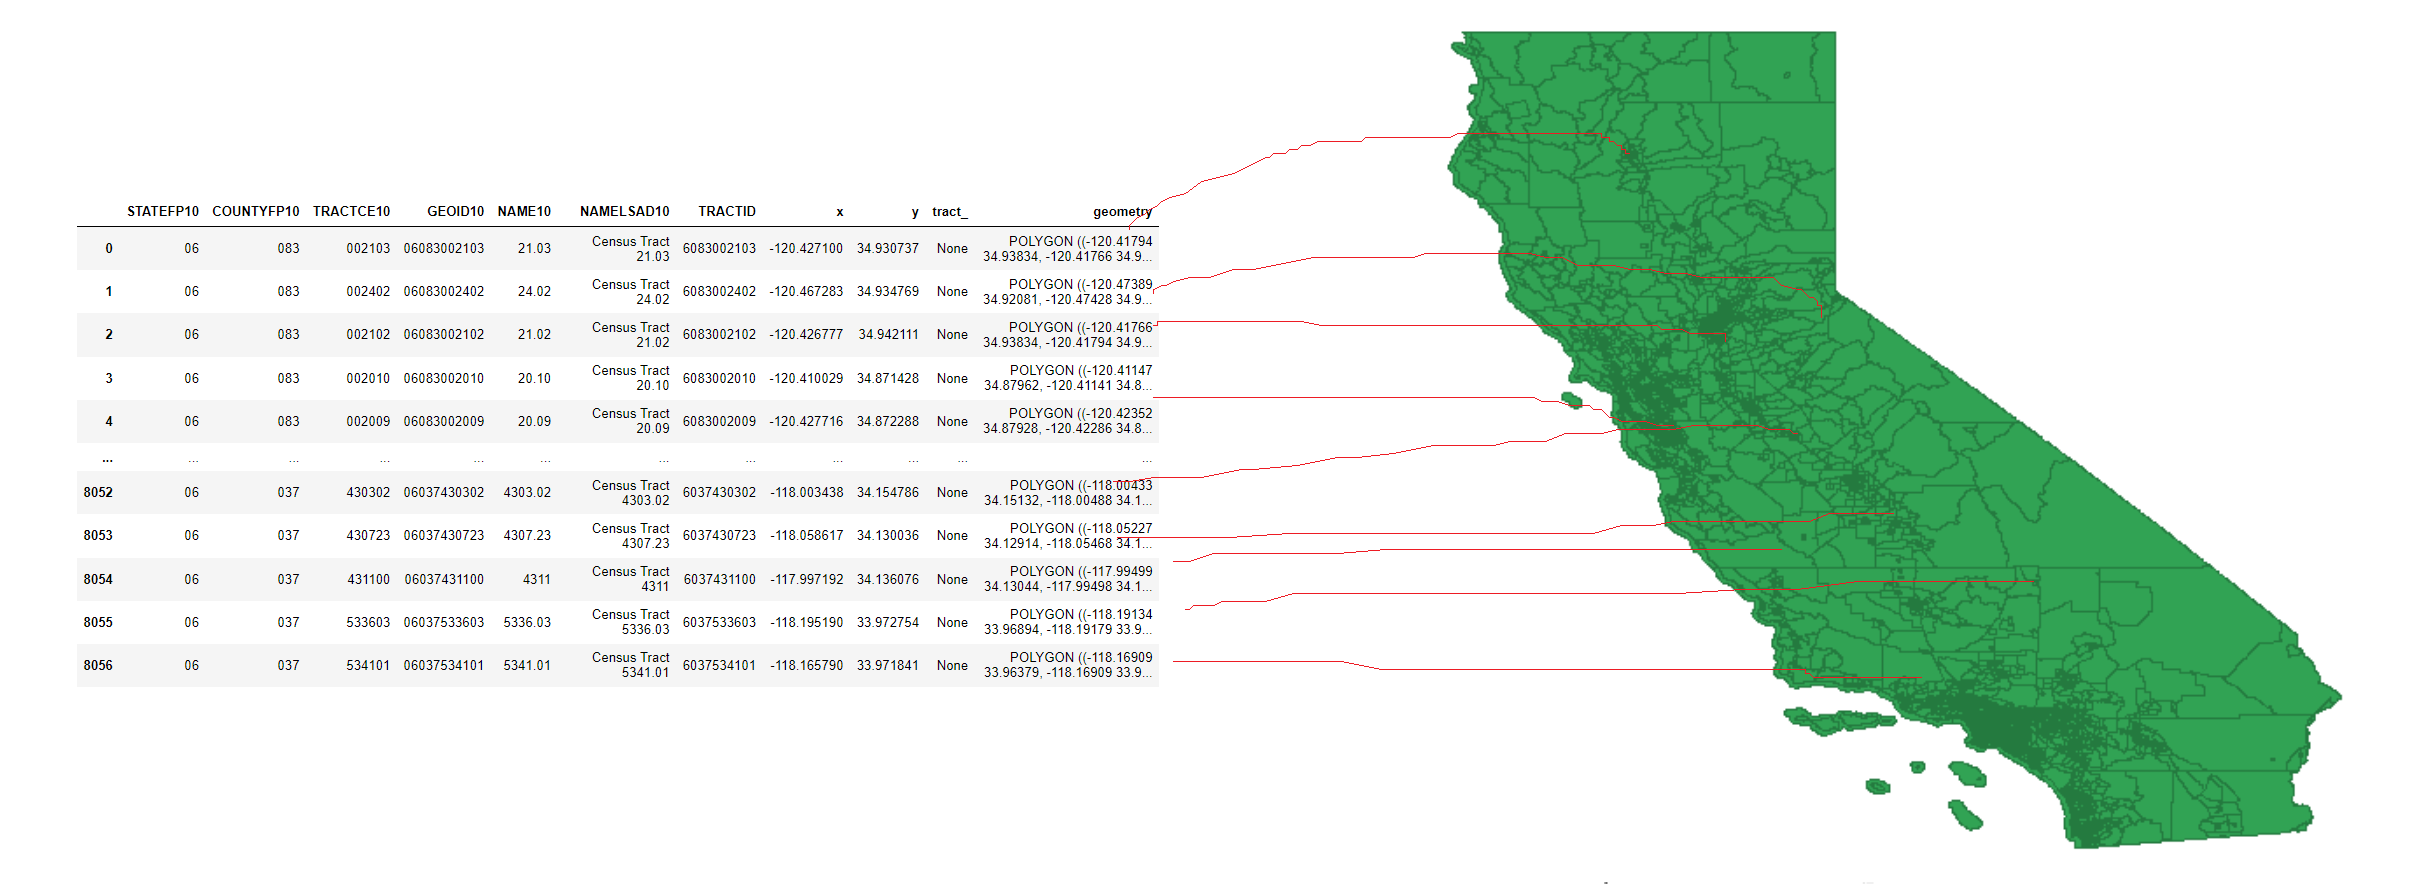

In order to do spatial analysis, you a shapefile. A shapefile is file that has spatial information and it can also information about each spatial unit. 

* So, the shapefile has a <b>visual component:</b>
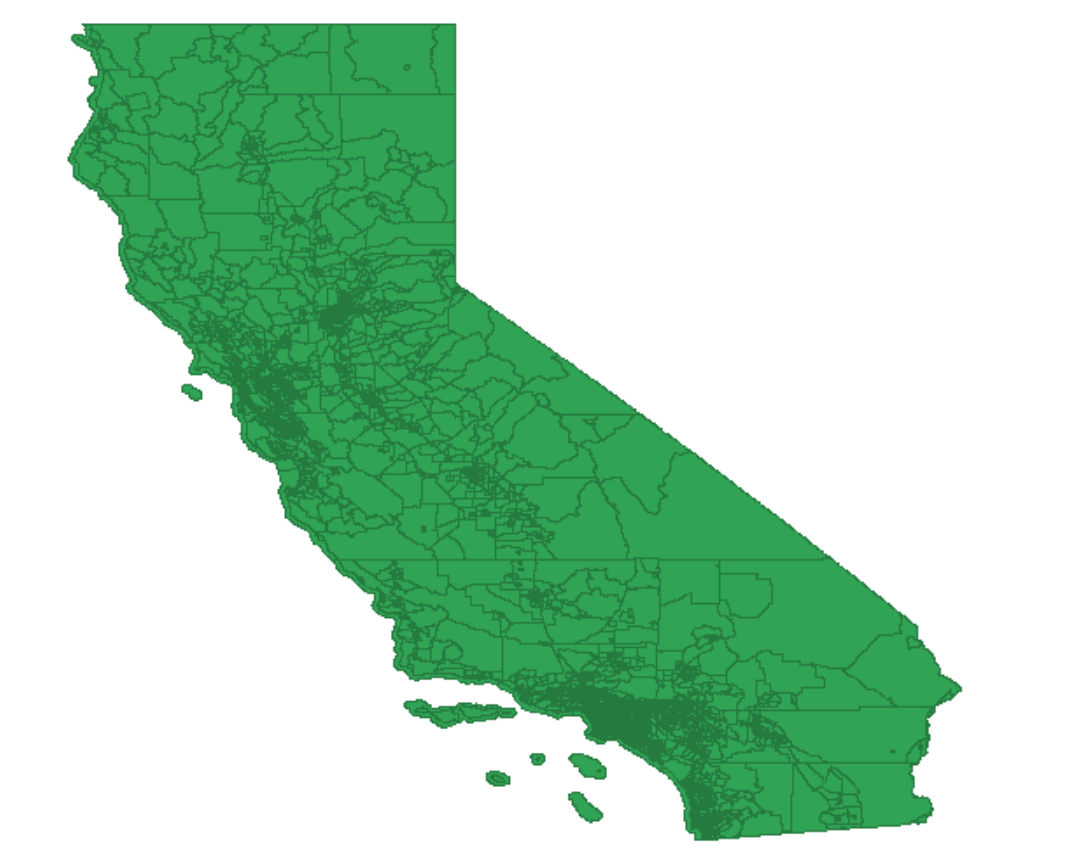

* The shapefile also has a <b>table component</b> too:
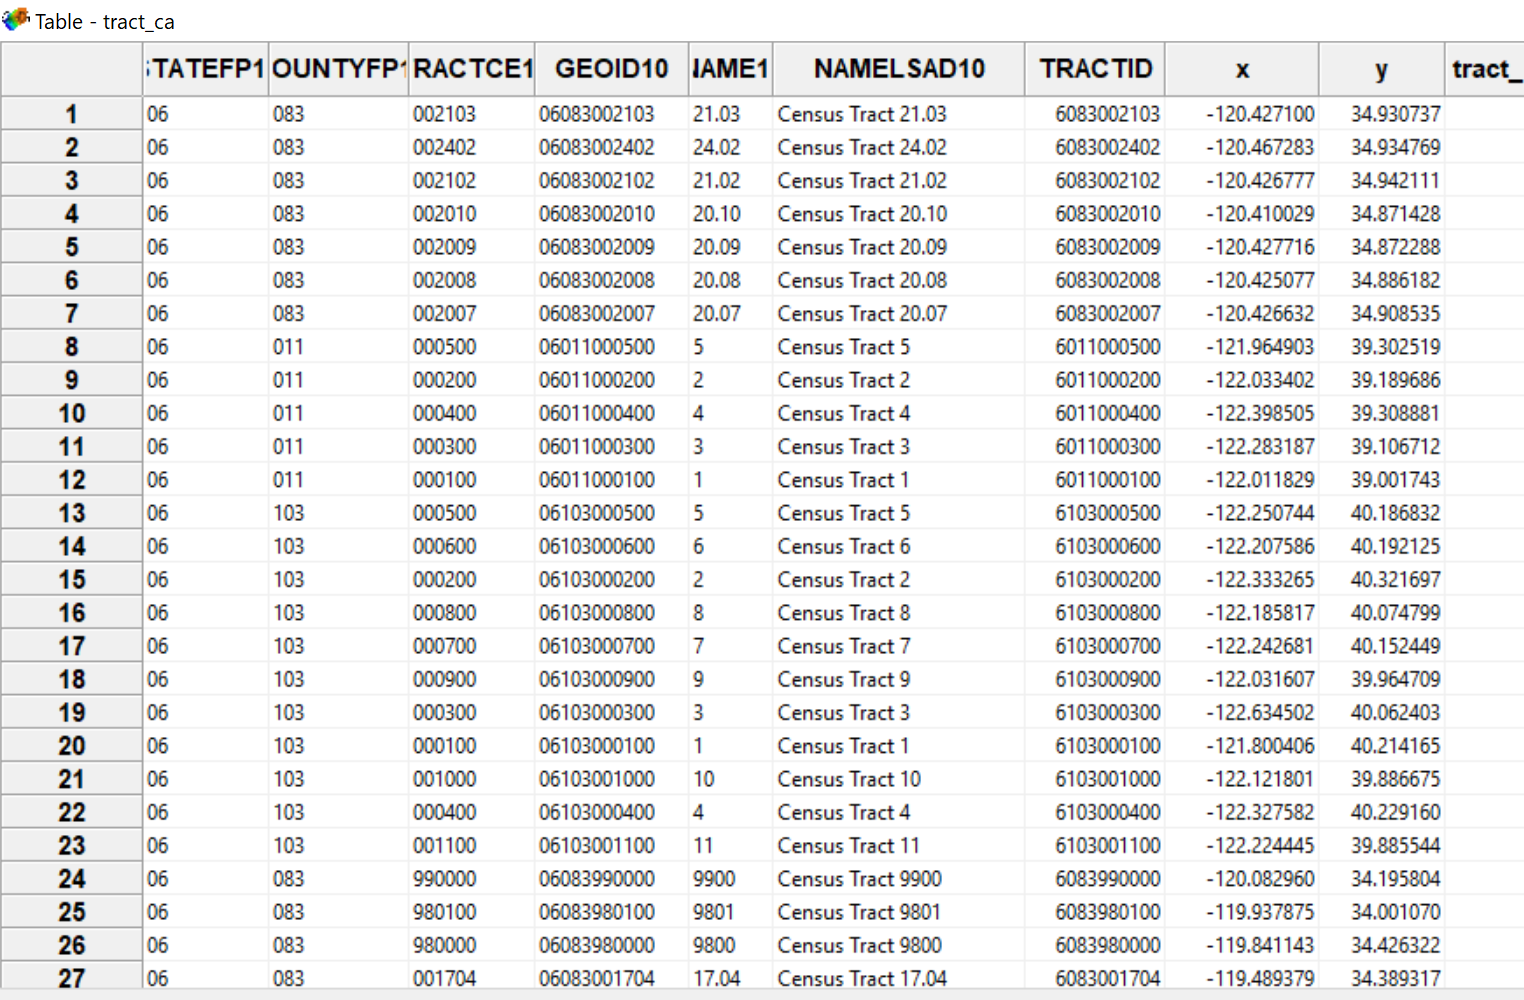

## Map Projections

Maps can be projected in different ways. Keep an eye for it. I am not going to talk too much about it here. Because the projection matter less for smaller location (like for example a specific city or specific county). Projections matter a lot more for larger studies (like the entire U.S.). All the examples we will be doing here are small locales. 

Below is a UTM projection is best used for small distances. I use this projection a lot. They have it for specific zones. So depending where your place is located determines which UTM zone.
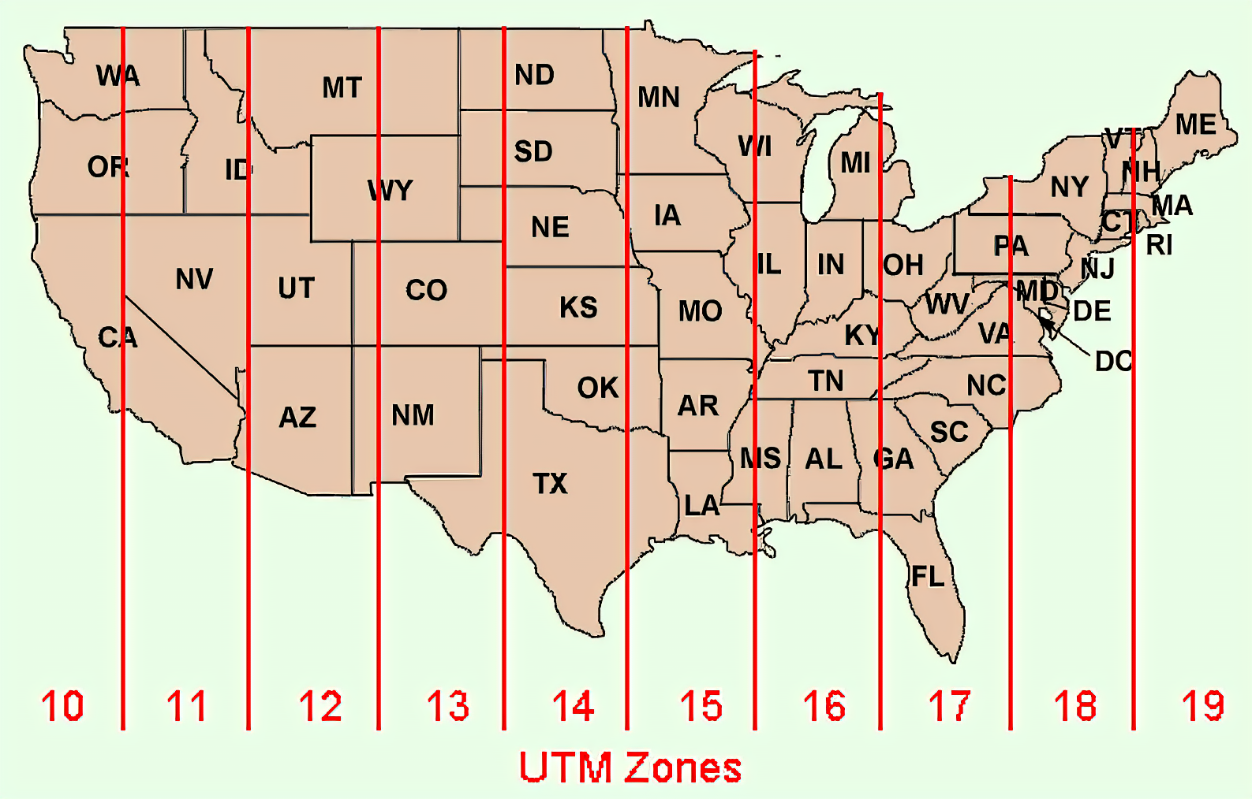